In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = {
    "weather":['Sunny', 'Sunny','Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
    ,"temp":['Hot', 'Hot','Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool','Mild','Mild','Mild','Hot','Mild']
    ,"play":['No', 'No', 'Yes','Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

data1= pd.DataFrame(data)
data1

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [22]:
X = data1[['weather', 'temp']]
y = data1['play']

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB

In [24]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

In [26]:
label_ecoder_weather = LabelEncoder()
label_ecoder_temp = LabelEncoder()

label_ecoder_y = LabelEncoder()

X['weather'] = label_ecoder_weather.fit_transform(X['weather'])
X['temp'] = label_ecoder_temp.fit_transform(X['temp'])
y = label_ecoder_y.fit_transform(y)



print(X)
print(y)
model = CategoricalNB()
model.fit(X,y)

    weather  temp
0         2     1
1         2     1
2         0     1
3         1     2
4         1     0
5         1     0
6         0     0
7         2     2
8         2     0
9         1     2
10        2     2
11        0     2
12        0     1
13        1     2
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


/var/folders/82/xvm9857168xgfh_sgfk12h7w0000gn/T/ipykernel_90324/3219211570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['weather'] = label_ecoder_weather.fit_transform(X['weather'])
/var/folders/82/xvm9857168xgfh_sgfk12h7w0000gn/T/ipykernel_90324/3219211570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['temp'] = label_ecoder_temp.fit_transform(X['temp'])


CategoricalNB()

In [27]:
model.score(X,y)

0.7857142857142857

In [29]:
model.predict_proba([[0,1]])

/Users/yjhouma/opt/anaconda3/envs/hacktiv8/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array([[0.2, 0.8]])

In [31]:
from sklearn import datasets

In [32]:
wine_data = datasets.load_wine()
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [33]:
X = wine_data.data
y = wine_data.target

data2 = pd.DataFrame(X, columns = wine_data.feature_names)

In [34]:
data2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


/var/folders/82/xvm9857168xgfh_sgfk12h7w0000gn/T/ipykernel_90324/2350121160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['flavanoids'])


<Axes: xlabel='flavanoids', ylabel='Density'>

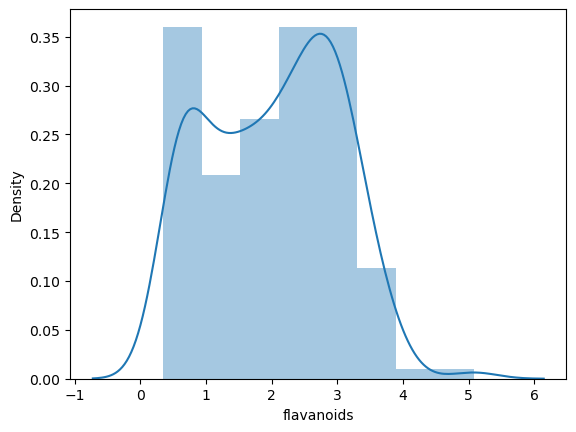

In [38]:
sns.distplot(data2['flavanoids'])

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size = .33, random_state=100)

In [43]:
X_train.shape

(119, 13)

In [44]:
X_test.shape

(59, 13)

In [45]:
nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)
nbmodel.score(X_train, y_train)

0.9747899159663865

In [46]:
nbmodel.score(X_test,y_test)

1.0

In [47]:
y_pred = nbmodel.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        23

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [50]:
from sklearn.metrics import log_loss

In [51]:
y_pred_proba = nbmodel.predict_proba(X_test)

In [53]:
log_loss(y_test,y_pred_proba)

0.0017944272829948375

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtmodel = DecisionTreeClassifier(random_state=10)

dtmodel.fit(X_train,y_train)
dtmodel.score(X_train,y_train)

1.0

In [57]:
dtmodel.score(X_test,y_test)

0.847457627118644

In [58]:
from sklearn import tree

[Text(0.5, 0.9, 'x[12] <= 755.0\ngini = 0.642\nsamples = 119\nvalue = [43, 51, 25]'),
 Text(0.25, 0.7, 'x[6] <= 1.275\ngini = 0.444\nsamples = 71\nvalue = [2, 49, 20]'),
 Text(0.125, 0.5, 'x[10] <= 1.005\ngini = 0.165\nsamples = 22\nvalue = [0, 2, 20]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 20\nvalue = [0, 0, 20]'),
 Text(0.1875, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.5, 'x[0] <= 13.175\ngini = 0.078\nsamples = 49\nvalue = [2, 47, 0]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(0.4375, 0.3, 'x[1] <= 2.125\ngini = 0.444\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.7, 'x[6] <= 1.605\ngini = 0.258\nsamples = 48\nvalue = [41, 2, 5]'),
 Text(0.625, 0.5, 'x[5] <= 1.24\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.5625, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6875, 0.3

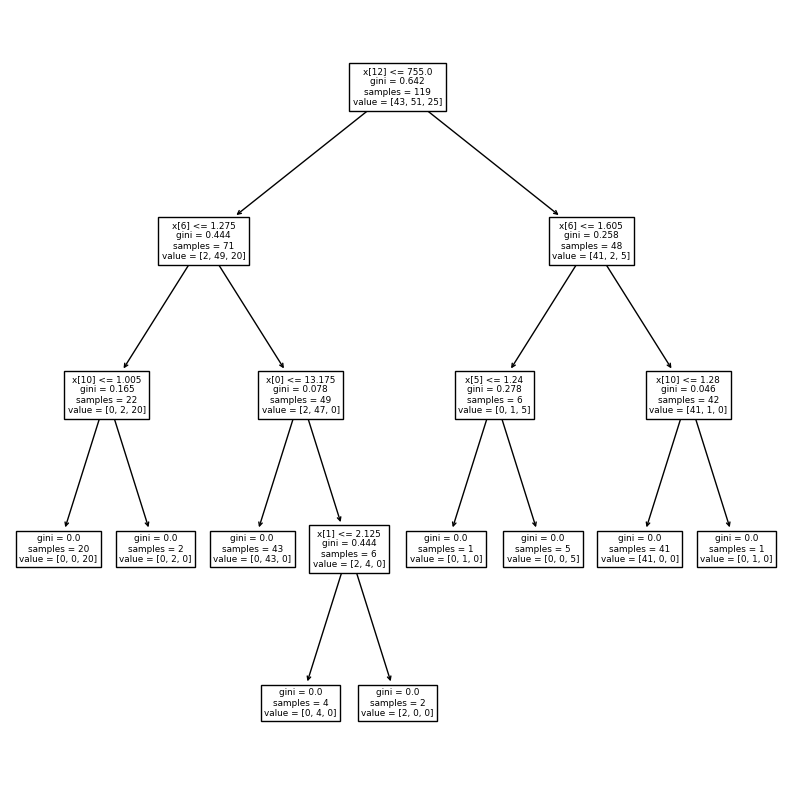

In [60]:
plt.figure(figsize=(10,10))
tree.plot_tree(dtmodel)


In [69]:
dtmodel2 = DecisionTreeClassifier(max_depth=2, random_state=10)

dtmodel2.fit(X_train,y_train)
dtmodel2.score(X_train,y_train)

0.9495798319327731

In [70]:
dtmodel2.score(X_test,y_test)

0.8305084745762712

[Text(0.5, 0.8333333333333334, 'x[12] <= 755.0\ngini = 0.642\nsamples = 119\nvalue = [43, 51, 25]'),
 Text(0.25, 0.5, 'x[6] <= 1.275\ngini = 0.444\nsamples = 71\nvalue = [2, 49, 20]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.165\nsamples = 22\nvalue = [0, 2, 20]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.078\nsamples = 49\nvalue = [2, 47, 0]'),
 Text(0.75, 0.5, 'x[6] <= 1.605\ngini = 0.258\nsamples = 48\nvalue = [41, 2, 5]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.046\nsamples = 42\nvalue = [41, 1, 0]')]

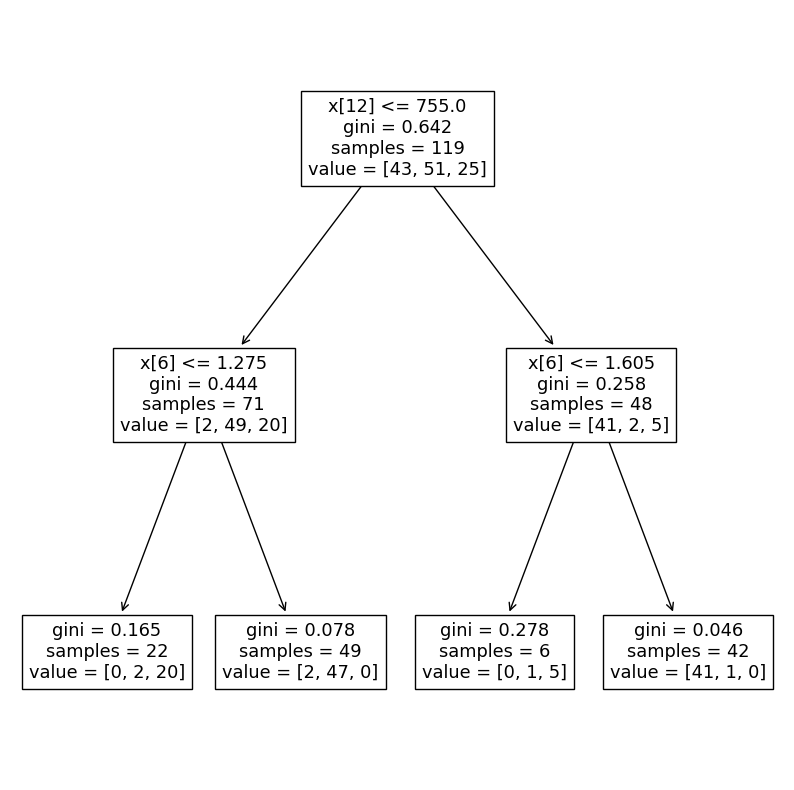

In [71]:
plt.figure(figsize=(10,10))
tree.plot_tree(dtmodel2)

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfmodel = RandomForestClassifier(n_estimators=10, max_depth=3,random_state=100)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=100)

In [84]:
print("Train Score: ", rfmodel.score(X_train, y_train))
print("Test Score: ", rfmodel.score(X_test, y_test))

Train Score:  0.9831932773109243
Test Score:  0.9661016949152542


In [88]:
feat_imp = pd.Series(rfmodel.feature_importances_, index=wine_data.feature_names).sort_values(ascending=False)

<Axes: >

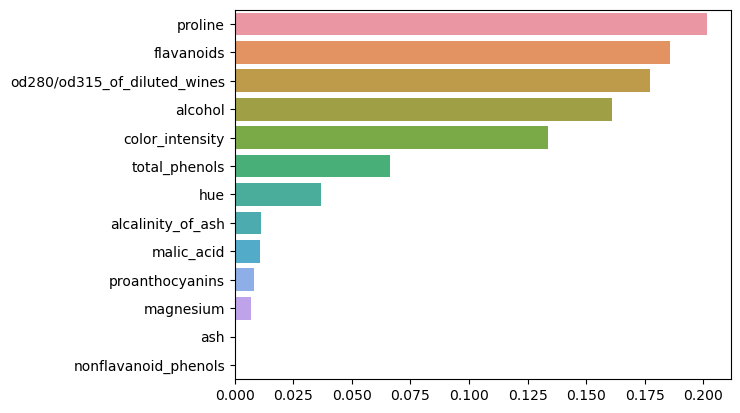

In [90]:
sns.barplot(x = feat_imp, y=feat_imp.index)

In [91]:
feat_imp.sum()

0.9999999999999999

In [92]:
from sklearn.svm import SVC

In [97]:
svcmodel = SVC(C=10, kernel='poly')
svcmodel.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [98]:
print("Train Score: ", svcmodel.score(X_train, y_train))
print("Test Score: ", svcmodel.score(X_test, y_test))

Train Score:  0.7563025210084033
Test Score:  0.5423728813559322


In [99]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
81,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562.0
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0


In [100]:
data = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv")

In [101]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [103]:
data_train, data_test = train_test_split(data,test_size=0.3, random_state=10)

In [105]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 245 to 265
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            429 non-null    object 
 1   Gender             419 non-null    object 
 2   Married            428 non-null    object 
 3   Dependents         419 non-null    object 
 4   Education          429 non-null    object 
 5   Self_Employed      406 non-null    object 
 6   ApplicantIncome    429 non-null    int64  
 7   CoapplicantIncome  429 non-null    float64
 8   LoanAmount         413 non-null    float64
 9   Loan_Amount_Term   418 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      429 non-null    object 
 12  Loan_Status        429 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 46.9+ KB


In [106]:
data_train['Dependents'].value_counts()

0     230
1      76
2      75
3+     38
Name: Dependents, dtype: int64

In [107]:
data_train["Property_Area"].value_counts()

Semiurban    166
Urban        136
Rural        127
Name: Property_Area, dtype: int64

In [108]:
data_train["Loan_ID"].nunique()

429

In [110]:
data_train["Credit_History"].value_counts()

1.0    322
0.0     72
Name: Credit_History, dtype: int64

In [112]:
loan_amount_mean = data_train['LoanAmount'].mean()
loan_amount_term_mean = data_train['Loan_Amount_Term'].mean()

In [115]:
data_train['LoanAmount'] = data_train['LoanAmount'].fillna(loan_amount_mean)
data_test['LoanAmount'] = data_test['LoanAmount'].fillna(loan_amount_mean)

In [117]:
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].fillna(loan_amount_term_mean)
data_test['Loan_Amount_Term'] = data_test['Loan_Amount_Term'].fillna(loan_amount_term_mean)

In [119]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 245 to 265
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            429 non-null    object 
 1   Gender             419 non-null    object 
 2   Married            428 non-null    object 
 3   Dependents         419 non-null    object 
 4   Education          429 non-null    object 
 5   Self_Employed      406 non-null    object 
 6   ApplicantIncome    429 non-null    int64  
 7   CoapplicantIncome  429 non-null    float64
 8   LoanAmount         429 non-null    float64
 9   Loan_Amount_Term   429 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      429 non-null    object 
 12  Loan_Status        429 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 46.9+ KB


In [123]:
data_train['Gender'].fillna("Unknown", inplace=True)
data_test['Gender'].fillna("Unknown", inplace=True)

data_train['Married'].fillna("Unknown", inplace=True)
data_test['Married'].fillna("Unknown", inplace=True)

In [124]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 245 to 265
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            429 non-null    object 
 1   Gender             429 non-null    object 
 2   Married            429 non-null    object 
 3   Dependents         419 non-null    object 
 4   Education          429 non-null    object 
 5   Self_Employed      406 non-null    object 
 6   ApplicantIncome    429 non-null    int64  
 7   CoapplicantIncome  429 non-null    float64
 8   LoanAmount         429 non-null    float64
 9   Loan_Amount_Term   429 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      429 non-null    object 
 12  Loan_Status        429 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 46.9+ KB


In [125]:
data_train['Dependents'].fillna(0, inplace=True)
data_test['Dependents'].fillna(0, inplace=True)

In [130]:
se_mode = data_train["Self_Employed"].mode()[0]
data_train['Self_Employed'].fillna(se_mode, inplace=True)
data_test['Self_Employed'].fillna(se_mode, inplace=True)

In [131]:
ch_mode = data_train["Credit_History"].mode()[0]
data_train['Credit_History'].fillna(ch_mode, inplace=True)
data_test['Credit_History'].fillna(ch_mode, inplace=True)

In [133]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 245 to 265
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            429 non-null    object 
 1   Gender             429 non-null    object 
 2   Married            429 non-null    object 
 3   Dependents         429 non-null    object 
 4   Education          429 non-null    object 
 5   Self_Employed      429 non-null    object 
 6   ApplicantIncome    429 non-null    int64  
 7   CoapplicantIncome  429 non-null    float64
 8   LoanAmount         429 non-null    float64
 9   Loan_Amount_Term   429 non-null    float64
 10  Credit_History     429 non-null    float64
 11  Property_Area      429 non-null    object 
 12  Loan_Status        429 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 46.9+ KB


In [134]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 285 to 195
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            185 non-null    object 
 1   Gender             185 non-null    object 
 2   Married            185 non-null    object 
 3   Dependents         185 non-null    object 
 4   Education          185 non-null    object 
 5   Self_Employed      185 non-null    object 
 6   ApplicantIncome    185 non-null    int64  
 7   CoapplicantIncome  185 non-null    float64
 8   LoanAmount         185 non-null    float64
 9   Loan_Amount_Term   185 non-null    float64
 10  Credit_History     185 non-null    float64
 11  Property_Area      185 non-null    object 
 12  Loan_Status        185 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 20.2+ KB


In [135]:
def encode_dependent(x):
    if x == '0':
        return 0
    if x == '1':
        return 1
    if x == '2':
        return 2
    else:
        return 3

In [137]:
data_train['Dependents'] = data_train['Dependents'].apply(encode_dependent)
data_test['Dependents'] = data_test['Dependents'].apply(encode_dependent)

In [139]:
data_train["Education"] = (data_train["Education"] == "Graduate").astype(int)
data_test["Education"] = (data_test["Education"] == "Graduate").astype(int)

data_train["Self_Employed"] = (data_train["Self_Employed"] == "Yes").astype(int)
data_test["Self_Employed"] = (data_test["Self_Employed"] == "Yes").astype(int)

data_train["Loan_Status"] = (data_train["Loan_Status"] == "Y").astype(int)
data_test["Loan_Status"] = (data_test["Loan_Status"] == "Y").astype(int)




In [140]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
245,LP001813,Male,No,0,1,1,6050,4333.0,120.0,180.0,1.0,Urban,0
413,LP002332,Male,Yes,0,0,0,2253,2033.0,110.0,360.0,1.0,Rural,1
126,LP001448,Unknown,Yes,3,1,0,23803,0.0,370.0,360.0,1.0,Rural,1
531,LP002720,Male,Yes,3,1,0,4281,0.0,100.0,360.0,1.0,Urban,1
188,LP001644,Unknown,Yes,0,1,1,674,5296.0,168.0,360.0,1.0,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,LP002191,Male,Yes,0,1,0,19730,5266.0,570.0,360.0,1.0,Rural,0
320,LP002051,Male,Yes,0,1,0,2400,2167.0,115.0,360.0,1.0,Semiurban,1
527,LP002706,Male,Yes,1,0,0,5285,1430.0,161.0,360.0,0.0,Semiurban,1
125,LP001443,Female,No,0,1,0,3692,0.0,93.0,360.0,1.0,Rural,1


In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler



ct = ColumnTransformer(
    [
        ('onehot_categorical', OneHotEncoder(), ["Gender","Married", "Property_Area"]),
        ('Minmax_numerical', MinMaxScaler(), ['Dependents', 'Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])
    ]
)


In [164]:
X_train = data_train.drop('Loan_Status',axis=1)
X_test = data_test.drop('Loan_Status',axis=1)

y_train = data_train.Loan_Status
y_test = data_test.Loan_Status


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [166]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=5)
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=50, max_depth=5)
kn = KNeighborsClassifier(n_neighbors=5)

In [167]:
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

In [168]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
nb.fit(X_train,y_train)
rf.fit(X_train,y_train)
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [169]:
print("Linear Model Score: ", lr.score(X_test,y_test))
print("DT Model Score: ", dt.score(X_test,y_test))
print("Naive Bayes Model Score: ", nb.score(X_test,y_test))
print("RF Model Score: ", rf.score(X_test,y_test))
print("kNN Model Score: ", kn.score(X_test,y_test))


Linear Model Score:  0.7945945945945946
DT Model Score:  0.5891891891891892
Naive Bayes Model Score:  0.2918918918918919
RF Model Score:  0.7945945945945946
kNN Model Score:  0.772972972972973
